In [3]:
library(dplyr)
library(dtplyr)
library(tidyr)
library(data.table)
library(tibble)
library(ggplot2)
library(hrbrthemes)
library(ggthemr)
library(viridis)
library(cowplot)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last


Attaching package: ‘ggplot2’

The following object is masked from ‘package:dplyr’:

    vars

Loading required package: viridisLite

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [18]:
fl = "~/PROJECTS/target_infect_x_project/src/tix-analysis/data/kmeans-transformed-bic.tsv"
fl2 = "~/PROJECTS/target_infect_x_project/src/tix-analysis/data/kmeans-transformed-statistics-gene_pathogen_prediction_counts.tsv"

In [19]:
cont <- readr::read_tsv(fl2, col_names=TRUE)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  gene = col_character(),
  pathogen = col_character(),
  prediction = col_integer(),
  count = col_integer()
)


In [20]:
gene.pathogen.combinations <- group_by(cont, gene, pathogen) %>%
    dplyr::summarize(n=n()) %>%
    ungroup()


In [24]:
dat <- dplyr::left_join(cont, gene.pathogen.combinations, by=c("gene", "pathogen"))
dat <- dplyr::mutate(dat, Frequency=count/n)

hs <- hist(dat$Frequency, breaks=300, plot=FALSE)
df <- data.frame(Frequency=hs$mids, Density=hs$counts/sum(hs$counts))
fre <- mean(dat$Frequency)

In [27]:
df

Frequency,Density
0.2025,0.2272727
0.2075,0.0000000
0.2125,0.0000000
0.2175,0.0000000
0.2225,0.0000000
0.2275,0.0000000
0.2325,0.0000000
0.2375,0.0000000
0.2425,0.0000000
0.2475,0.1590909


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

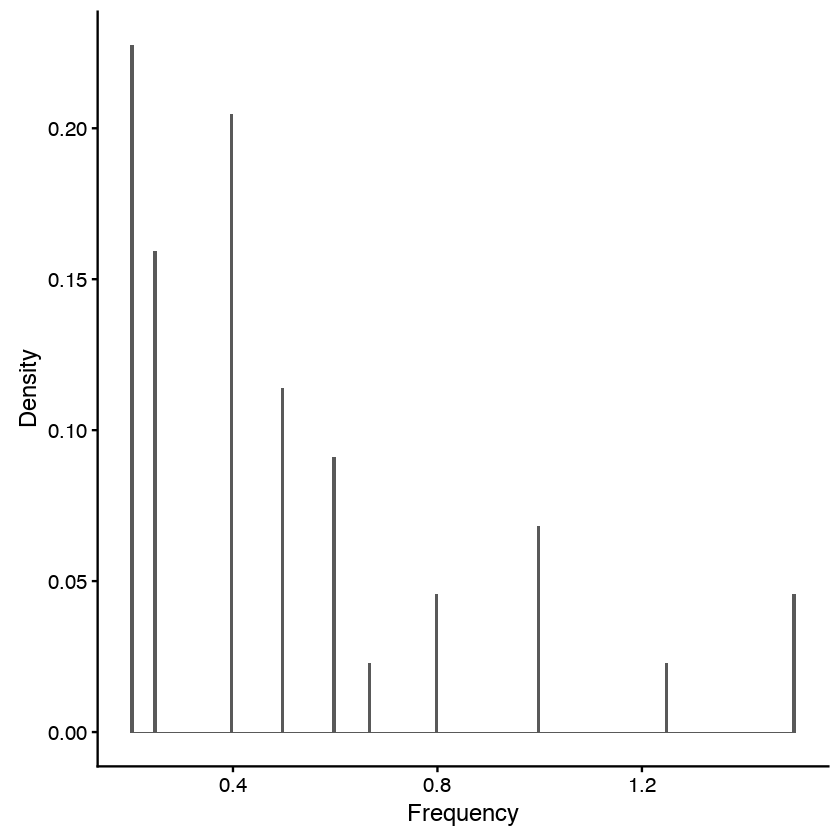

In [29]:
ggplot(df) +
    geom_histogram(aes(x=Frequency, y=Density), stat="identity")